# Retrieving track data from fastf1 library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import fastf1

In [32]:
session = fastf1.get_session(2024, 'Monaco', 'FP2')
session.load(telemetry=False)

session.load(telemetry=False)

# Get all laps data
laps = session.laps

# Specify the driver you're interested in
driver_name = "TSU"  # Replace this with the driver's name or identifier

# Initialize a list to store weather data for the specific driver
driver_weather = []

# Loop through each lap and filter by driver
for lap_index, lap in laps.iterlaps():
    # Check if the lap corresponds to the specified driver
    if lap['Driver'] == driver_name:
        # Get weather data for that lap
        weather = lap.get_weather_data()
        # Add weather data to the list
        driver_weather.append(weather)

# Create a DataFrame from the weather data
weather_df = pd.DataFrame(driver_weather).reset_index()

# Display the DataFrame
print(weather_df)

core           INFO 	Loading data for Monaco Grand Prix - Practice 2 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Monaco Grand Prix - Practice 2 [v3.5.3]
req            INFO 	Using cached data for session_info
req   

    index                   Time  AirTemp  Humidity  Pressure  Rainfall  \
0      16 0 days 00:16:38.997000     20.2      70.0    1017.4     False   
1      18 0 days 00:18:39.018000     20.3      69.0    1017.3     False   
2      19 0 days 00:19:39.030000     20.4      68.0    1017.2     False   
3      21 0 days 00:21:39.029000     20.6      67.0    1017.4     False   
4      22 0 days 00:22:39.046000     20.7      67.0    1017.4     False   
5      23 0 days 00:23:39.115000     20.7      67.0    1017.4     False   
6      25 0 days 00:25:39.072000     20.7      68.0    1017.3     False   
7      26 0 days 00:26:39.084000     20.7      68.0    1017.3     False   
8      28 0 days 00:28:39.115000     20.8      68.0    1017.3     False   
9      29 0 days 00:29:39.114000     20.9      68.0    1017.3     False   
10     31 0 days 00:31:39.134000     20.9      69.0    1017.3     False   
11     32 0 days 00:32:39.149000     21.0      68.0    1017.1     False   
12     34 0 days 00:34:39

In [33]:
weather_df = weather_df.drop(columns=['AirTemp', 'Pressure', 'Rainfall', 'WindDirection'])

In [34]:
weather_df.head()

,index,Time,Humidity,TrackTemp,WindSpeed
0,16,0 days 00:16:38.997000,70.0,31.5,0.6
1,18,0 days 00:18:39.018000,69.0,32.1,0.8
2,19,0 days 00:19:39.030000,68.0,32.1,0.9
3,21,0 days 00:21:39.029000,67.0,32.0,0.3
4,22,0 days 00:22:39.046000,67.0,31.3,1.0


In [37]:
weather_df.to_csv('weather_data.csv', index=False)

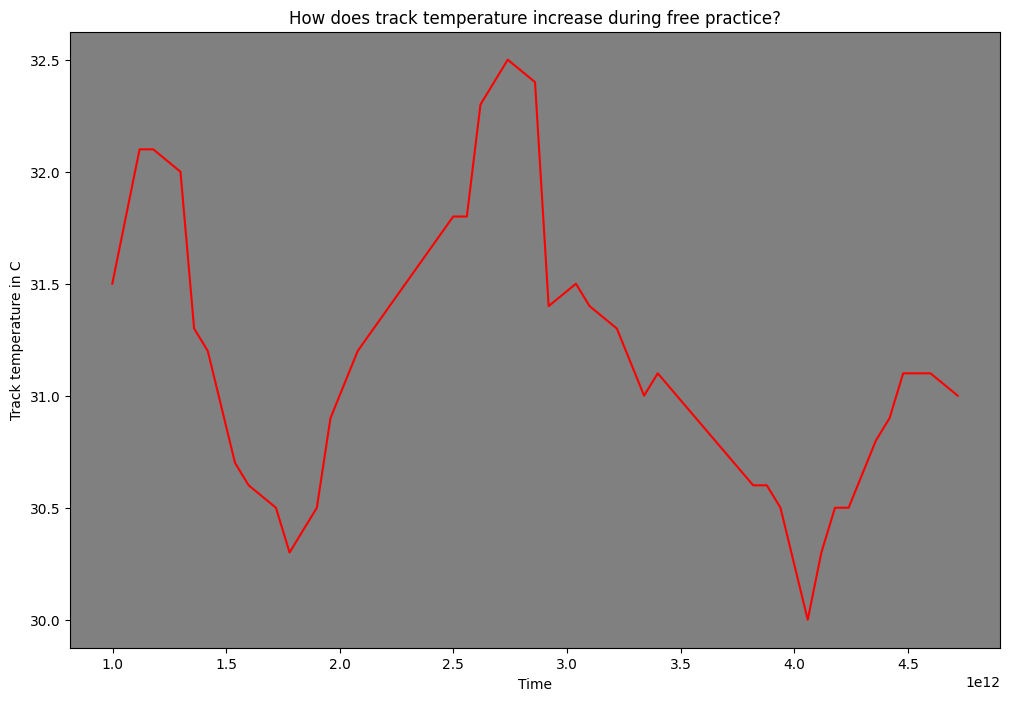

In [36]:
from fastf1 import plotting

fig, ax = plt.subplots(figsize=(12,8))


ax.plot(weather_df['Time'], weather_df['TrackTemp'], color='red')
ax.set_facecolor('grey')
ax.set_xlabel('Time')
ax.set_ylabel('Track temperature in C')
ax.set_title('How does track temperature increase during free practice?')
plt.savefig('track_temp_fp3.png')